In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
df_Unemployed = pd.read_csv('EurostatUnemploymentRates.csv')
df_Crime = pd.read_csv('CrimeRatesIreland.csv')
df_Imm = pd.read_csv('ImmigrantDataIreland.csv')

# Filter data from 2019 to 2022
df_Crime = df_Crime[df_Crime['Year'].between(2019, 2022)]
df_Unemployed = df_Unemployed[df_Unemployed['Year'].between(2019, 2022)]
df_Imm = df_Imm[df_Imm['Year'].between(2019, 2022)]

# Crime data preparation
df_Crime_Detected = df_Crime[df_Crime['Statistic Label'] == 'Detected crimes']
Detected_Crime_Yearly = df_Crime_Detected.groupby('Year')['VALUE'].sum()

# Unemployment data preparation
df_Unemployed = df_Unemployed[(df_Unemployed['Countries'] == 'Ireland') & (df_Unemployed['Sex'] == 'Total Persons')]

# Immigration data preparation
df_Imm = df_Imm[(df_Imm['Citizenship'] == 'All Countries') & (df_Imm['Sex'] == 'Both sexes')]



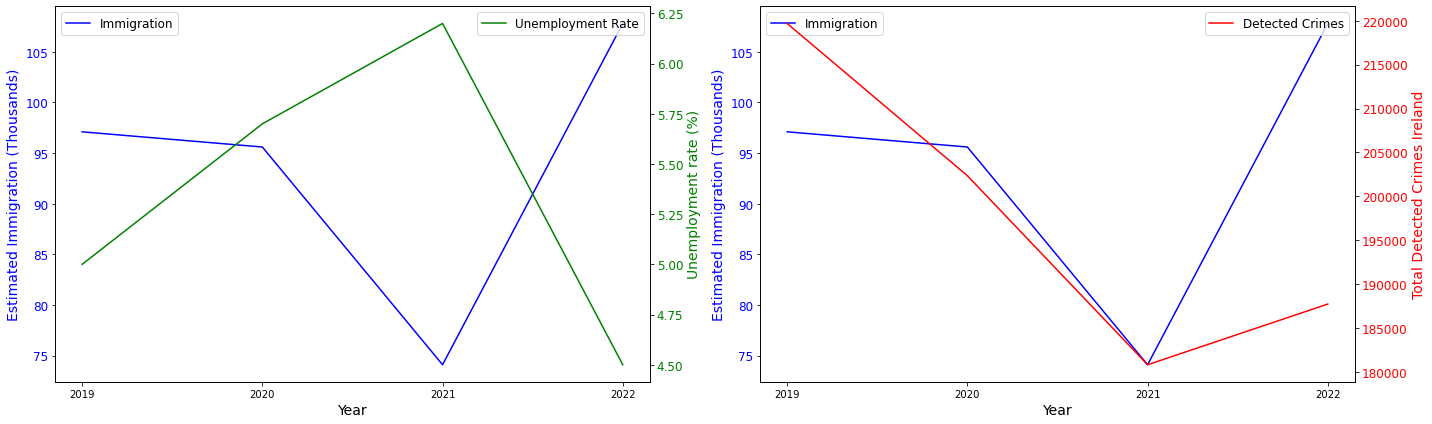

In [31]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot Immigration vs Unemployment
ax1.plot(df_Imm['Year'], df_Imm['VALUE'], color='blue', label='Immigration')
ax1.set_ylabel('Estimated Immigration (Thousands)', color='blue', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.set_xticks(df_Imm['Year'])
ax1_sec = ax1.twinx()
ax1_sec.plot(df_Unemployed['Year'], df_Unemployed['VALUE'], 'green', label='Unemployment Rate')
ax1_sec.set_ylabel('Unemployment rate (%)', color='green', fontsize=14)
ax1_sec.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1_sec.legend(loc='upper right', fontsize=12)

# Plot Immigration vs Detected Crimes
ax2.plot(df_Imm['Year'], df_Imm['VALUE'], color='blue', label='Immigration')
ax2.set_ylabel('Estimated Immigration (Thousands)', color='blue', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax2.set_xticks(df_Imm['Year'])
ax2_sec = ax2.twinx()
ax2_sec.plot(Detected_Crime_Yearly.index, Detected_Crime_Yearly.values, 'red', label='Detected Crimes')
ax2_sec.set_ylabel('Total Detected Crimes Ireland', color='red', fontsize=14)
ax2_sec.tick_params(axis='y', labelcolor='red', labelsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2_sec.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('Immigration_Trends.png')
plt.show()

In [32]:
from scipy.stats import pearsonr

# Investigate immigration with employment
immigration_employment_corr, immigration_employment_p_value = pearsonr(df_Imm['VALUE'], df_Unemployed['VALUE'])
print("\nCorrelation between Immigration and Unemployment:")
print(f"Correlation coefficient: {immigration_employment_corr}")
print(f"P-value: {immigration_employment_p_value}")

# Investigate immigration with detected crimes
immigration_crime_corr, immigration_crime_p_value = pearsonr(df_Imm['VALUE'], Detected_Crime_Yearly)
print("\nCorrelation between Immigration and Detected Crimes:")
print(f"Correlation coefficient: {immigration_crime_corr}")
print(f"P-value: {immigration_crime_p_value}")


Correlation between Immigration and Unemployment:
Correlation coefficient: -0.9174772074279902
P-value: 0.08252279257200978

Correlation between Immigration and Detected Crimes:
Correlation coefficient: 0.3754583591605771
P-value: 0.6245416408394229
